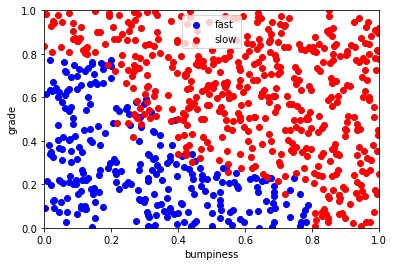

In [27]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
%matplotlib inline

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
from time import time
from sklearn.metrics import classification_report

In [113]:
### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
from sklearn.neighbors import KNeighborsClassifier as knn

clfknn = knn(n_neighbors = 10,weights='distance')
clfknn.fit(features_train,labels_train)
predknn = clfknn.predict(features_test)

accknn = accuracy_score(labels_test, predknn)
print('accuracy: ',accknn)


accuracy:  0.94


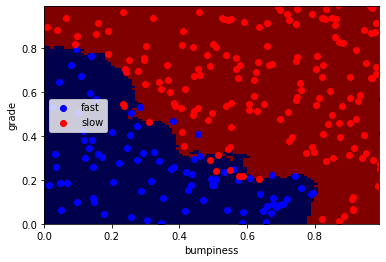

In [32]:
try:
    prettyPicture(clfknn, features_test, labels_test)
except NameError:
    pass

Adaboost now

In [71]:
from sklearn.ensemble import AdaBoostClassifier as abc

clfabc = abc(n_estimators=100, learning_rate=1, random_state=50)
clfabc.fit(features_train,labels_train)
predabc = clfabc.predict(features_test)
print(clfabc.score(features_train,labels_train))
accabc = accuracy_score(labels_test, predabc)
print('accuracy: ',accabc)


0.992
accuracy:  0.924


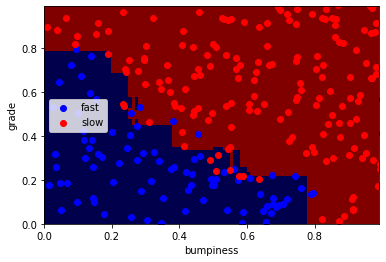

In [70]:
try:
    prettyPicture(clfabc, features_test, labels_test)
except NameError:
    pass

RandomForest now

In [112]:
from sklearn.ensemble import RandomForestClassifier as rfc

clfrfc = rfc(n_estimators = 500,criterion='entropy', min_samples_split=0.1, bootstrap=False,random_state=0)
clfrfc.fit(features_train,labels_train)
predrfc = clfrfc.predict(features_test)
print(clfrfc.score(features_train,labels_train))
accrfc = accuracy_score(labels_test, predrfc)
print('accuracy: ',accrfc)

0.968
accuracy:  0.924


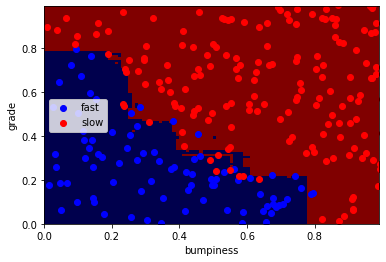

In [108]:
try:
    prettyPicture(clfrfc, features_test, labels_test)
except NameError:
    pass